# Predicting Stroke
Author: Necky Tran <br>
Date: 06/06/23

### Table of Contents

1. [Introduction](#Introduction)
2. [Wrangling](#Wrangling)
3. [Statistical Analysis](#Statistical_Analysis)
4. [Logistic Regression](#Logistic)
5. [Summary](#Summary)

# Introduction
This notebook contains an analysis of a of a US Health Insurance Dataset. The dataset is sourced from Kaggle:
- 'https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset'

The dataset was cleaned and analyzed to generate a logistic model to predict likelyhood of stroke.

In [29]:
# load standard packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# read in and check data
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


The data has been successfully loaded


# Wrangling
- Exploratory Data Analysis
    - Find which columns need to be converted into numeric
    - Deal with NaNs and Duplicates

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


There are 5110 rows and 12 columns

The [bmi] column has some missing values, we can explore this further 

In [32]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [33]:
# Check which columns have NaN values
#.isna() returns a dataframe of T/F for any element that is missing
#.any() tells us if there are any Trues in that column
df.isna().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                   True
smoking_status       False
stroke               False
dtype: bool

In [34]:
df.isna().mean()*100

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  3.933464
smoking_status       0.000000
stroke               0.000000
dtype: float64

The BMI column has some NAs, about 4% of the total data. Explore futher to make a decision one whether to drop or impute <br>

In [35]:
# find rows of data where bmi is missing
df[df['bmi'].isna()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
13,8213,Male,78.0,0,1,Yes,Private,Urban,219.84,NaN,Unknown,1
19,25226,Male,57.0,0,1,No,Govt_job,Urban,217.08,NaN,Unknown,1
27,61843,Male,58.0,0,0,Yes,Private,Rural,189.84,NaN,Unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5039,42007,Male,41.0,0,0,No,Private,Rural,70.15,NaN,formerly smoked,0
5048,28788,Male,40.0,0,0,Yes,Private,Urban,191.15,NaN,smokes,0
5093,32235,Female,45.0,1,0,Yes,Govt_job,Rural,95.02,NaN,smokes,0
5099,7293,Male,40.0,0,0,Yes,Private,Rural,83.94,NaN,smokes,0


There are 201 rows where the bmi value is missing

In [36]:
# explore missing data, 
df[df['bmi'].isna()].describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,201.000000,201.000000,201.000000,201.000000,201.000000,0.0,201.000000
mean,23171.109453,52.049154,0.233831,0.164179,126.724627,NaN,0.199005
std,20882.483120,22.276181,0.424323,0.371363,59.240322,NaN,0.400249
min,67.000000,0.480000,0.000000,0.000000,57.520000,NaN,0.000000
25%,4062.000000,37.000000,0.000000,0.000000,81.430000,NaN,0.000000
50%,18234.000000,58.000000,0.000000,0.000000,99.870000,NaN,0.000000
75%,37937.000000,71.000000,0.000000,0.000000,191.790000,NaN,0.000000
max,72231.000000,82.000000,1.000000,1.000000,260.850000,NaN,1.000000


 28.89 is the mean BMI
 28.1 is the median BMI


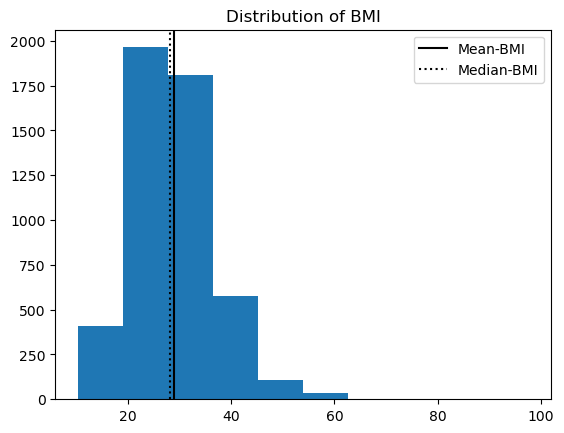

In [37]:
# histogram of two categories
plt.hist(df['bmi'])
plt.axvline(df['bmi'].mean(),linestyle = 'solid',label = "Mean-BMI", color = 'black')
plt.axvline(df['bmi'].median(),linestyle = 'dotted',label = "Median-BMI", color = 'black')
plt.title('Distribution of BMI')
plt.legend(loc='upper right');


print(f" {round(df['bmi'].mean(), 2)} is the mean BMI")

print(f" {df['bmi'].median()} is the median BMI")

The mean and median BMI are very similar which means this data is symetrically distributed around a central value. There are no extreme outliers pulling the mean away from the median. It would be appropriate to use a mean imputation on the missing data.

Lets check for duplications before we impute

In [38]:
#check for duplicated values
df.duplicated().sum()

0

There are no duplicated rows in the Dataset

Do the mean imputation

In [39]:
# mean imputation
df['bmi'] = np.where(df['bmi'].isna(), 28, df['bmi'])

In [40]:
# check
df['bmi'].isna().sum()

0

The missing values have been successfully imputed with the mean.

Explore the columns of the dataset

In [41]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


Columns Gender, every_married, work_type, residence_type, and smoking status are object columns that should be numerically encoded

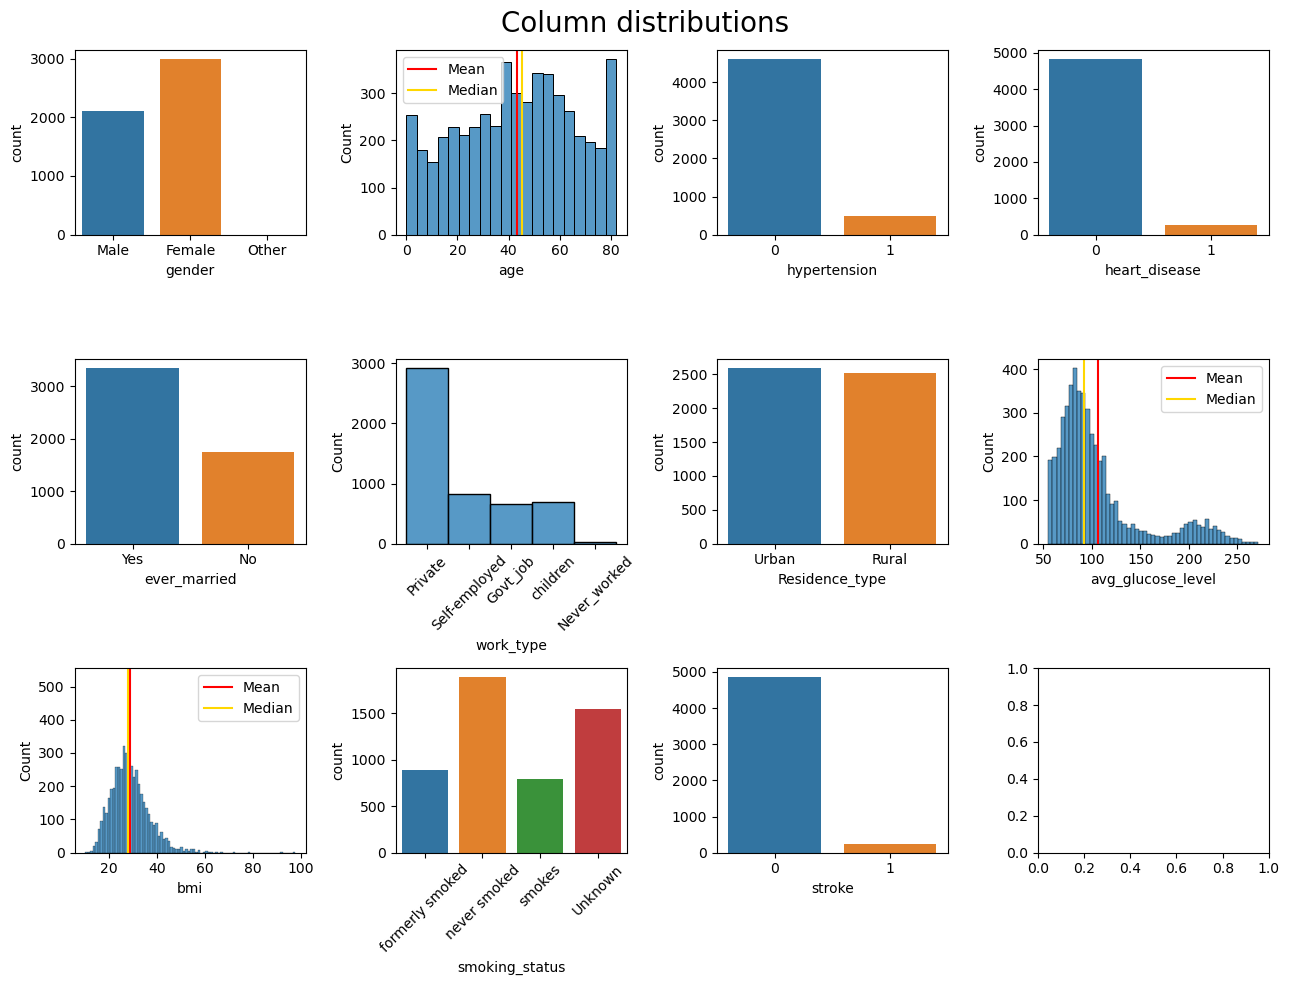

In [42]:
plt.subplots(3,4, figsize = (13,10))
plt.suptitle('Column distributions', size =20)

plt.subplot(3,4,1)
sns.countplot(x = df['gender'])
#plt.title('Gender')

plt.subplot(3,4,2)
sns.histplot(x = df['age'])
plt.axvline(df['age'].mean(), c='red', label='Mean')
plt.axvline(df['age'].median(), c='gold', label='Median')
plt.legend()
#plt.title('Age')

plt.subplot(3,4,3)
sns.countplot(x = df['hypertension'])
#plt.title('Hypertension')

plt.subplot(3,4,4)
sns.countplot(x = df['heart_disease'])
#plt.title('Heart Disease')

plt.subplot(3,4,5)
sns.countplot(x = df['ever_married'])
#plt.title('Married')

plt.subplot(3,4,6)
sns.histplot(x = df['work_type'])
#plt.title('Work Type')
plt.xticks(rotation=45)

plt.subplot(3,4,7)
sns.countplot(x = df['Residence_type'])
# plt.title('Residence')

plt.subplot(3,4,8)
sns.histplot(x = df['avg_glucose_level'])
plt.axvline(df['avg_glucose_level'].mean(), c='red', label='Mean')
plt.axvline(df['avg_glucose_level'].median(), c='gold', label='Median')
plt.legend()
# plt.title('Glucose level')

plt.subplot(3,4,9)
sns.histplot(x = df['bmi'])
plt.axvline(df['bmi'].mean(), c='red', label='Mean')
plt.axvline(df['bmi'].median(), c='gold', label='Median')
plt.legend()
# plt.title('bmi')

plt.subplot(3,4,10)
sns.countplot(x = df['smoking_status'])
# plt.title('Smoker')
plt.xticks(rotation=45)

plt.subplot(3,4,11)
sns.countplot(x = df['stroke'])
# plt.title('stroke')

plt.tight_layout()

### Oservations into the features: <br>
gender: more females than males <br>
age: most ages are normally distributed around 40, there are a large group of 80+ people <br>
hypertension: most do not have hypertension <br>
heart_disease: msot do not have heart disease <br>
ever_married: larger proportion of people are married <br>
work_type: most are privately employed <br>
residence_type: the distribution between urban and rural residence is about equal <br>
avg_glucose_level: the distribution has a right skew <br>
bmi: looks normally distributed around a mean of ~29 <br>
smoking_status: most have never smoked or formorly smoked <br>
stroke: most have not experienced a stroke <br>


Our target is very unbalanced, we should fix this after our first attempt at modelling <br>

Before modelling, create dummy variables out of all the categorical variables

In [43]:
# Get a list of all categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Perform one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Display the encoded DataFrame
print(df_encoded)

         id   age  hypertension  heart_disease  avg_glucose_level   bmi  \
0      9046  67.0             0              1             228.69  36.6   
1     51676  61.0             0              0             202.21  28.0   
2     31112  80.0             0              1             105.92  32.5   
3     60182  49.0             0              0             171.23  34.4   
4      1665  79.0             1              0             174.12  24.0   
...     ...   ...           ...            ...                ...   ...   
5105  18234  80.0             1              0              83.75  28.0   
5106  44873  81.0             0              0             125.20  40.0   
5107  19723  35.0             0              0              82.99  30.6   
5108  37544  51.0             0              0             166.29  25.6   
5109  44679  44.0             0              0              85.28  26.2   

      stroke  gender_Male  gender_Other  ever_married_Yes  \
0          1            1             

In [44]:
df_encoded.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.0,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


Check for multicolinearity with a heatmap

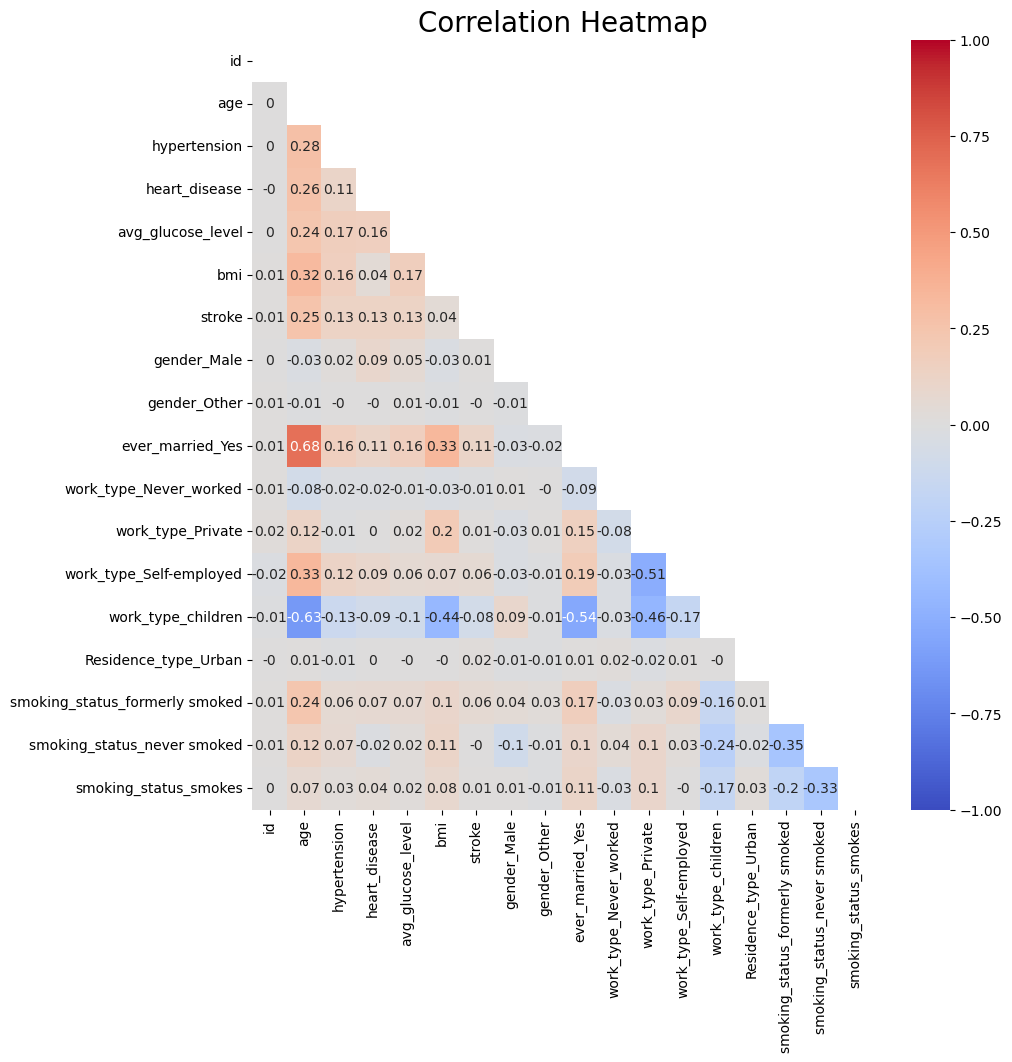

In [45]:
# heatmap 
plt.figure(figsize=(10,10))
sns.heatmap(df_encoded.corr().round(2), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = np.triu(df_encoded.corr()) )
plt.title('Correlation Heatmap', size = 20)
plt.show()

Correlations <br>
Age is correlated with every_married_yes and work_type children <br>
BMI is correlated with every_married_yes and work_type children <br>
work_type_children is correlated with ever_married_yes and work_type_private <br>

All the work types are negatively correlated with each other, it would be wise to remove some of them. From our countplot, most people work in the private sector. So we can remove all but the work_type_private <br>

I will also remove ever_married_yes because it is correlated with age, and age is a feature i want to keep <br>

Also drop the 'id' column

In [46]:
df_encoded.drop(['ever_married_Yes', 'work_type_children', 'work_type_Self-employed', 'id'], axis = 1, inplace = True)

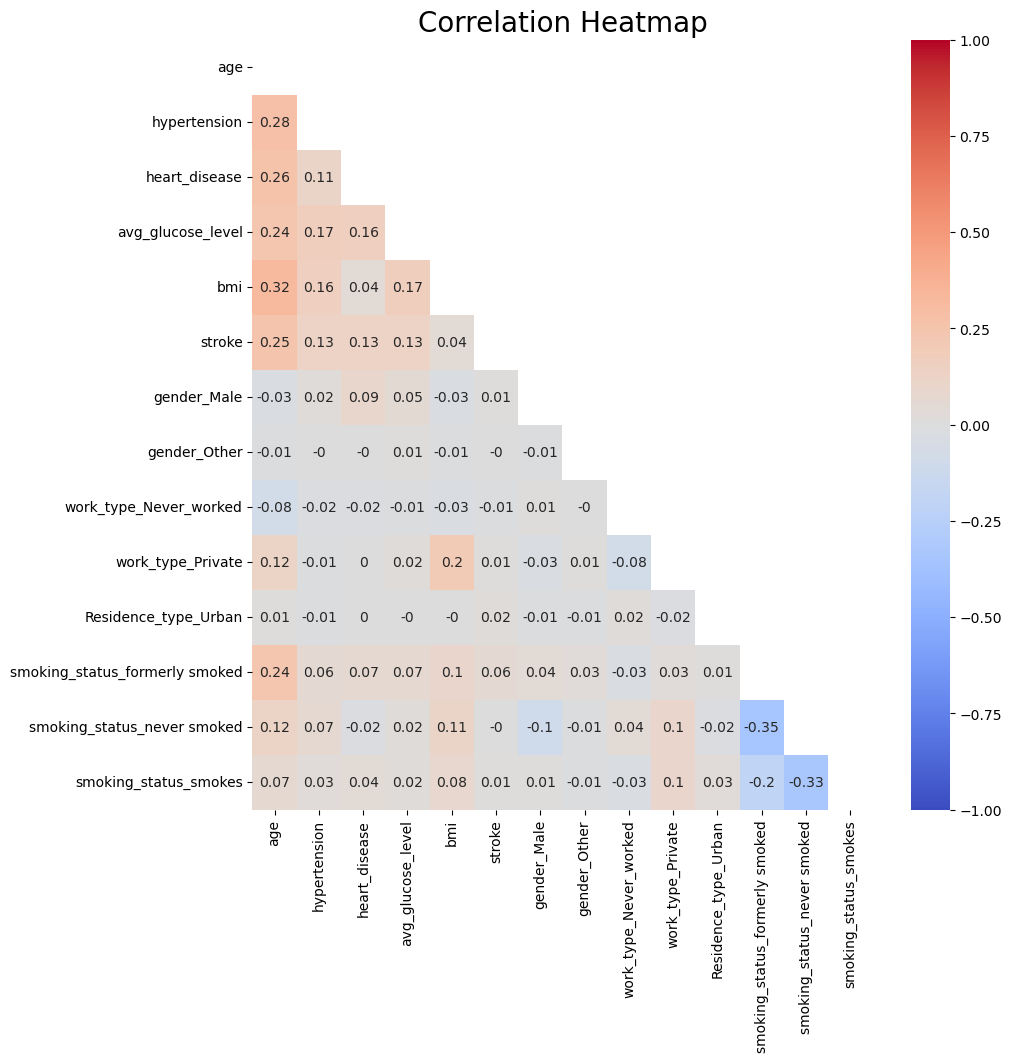

In [47]:
# heatmap, check for correlations again
plt.figure(figsize=(10,10))
sns.heatmap(df_encoded.corr().round(2), annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, mask = np.triu(df_encoded.corr()) )
plt.title('Correlation Heatmap', size = 20)
plt.show()

we have removed the strongly correlated variables

In [48]:
import statsmodels.api as sm

y = df_encoded['stroke']
x = df_encoded.drop('stroke', axis=1)

# !! Add constant to our X !!
X_0 = sm.add_constant(x)



In [49]:
# Instantiate the logistic regression model 
logreg_0 = sm.Logit(y, X_0)

# Fit the model (this returns a separate object with the parameters)
logreg_results_0 = logreg_0.fit()

# Display the results 
logreg_results_0.summary()

         Current function value: 0.155030
         Iterations: 35


c:\Users\trann\anaconda3\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                 stroke   No. Observations:                 5110
Model:                          Logit   Df Residuals:                     5096
Method:                           MLE   Df Model:                           13
Date:                Thu, 24 Aug 2023   Pseudo R-squ.:                  0.2040
Time:                        21:10:53   Log-Likelihood:                -792.20
converged:                      False   LL-Null:                       -995.19
Covariance Type:            nonrobust   LLR p-value:                 1.230e-78
==================================================================================================
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                             -7.7438      0.552    -14.036      0.000      -8.825      -6.662
age                                0.0708      0.005     13.111      0.000       0.060       0.081
hypertension                       0.4046      0.164      2.460      0.014       0.082       0.727
heart_disease                      0.2921      0.191      1.533      0.125      -0.081       0.666
avg_glucose_level                  0.0041      0.001      3.400      0.001       0.002       0.006
bmi                               -0.0013      0.011     -0.118      0.906      -0.023       0.021
gender_Male                        0.0089      0.141      0.063      0.950      -0.268       0.286
gender_Other                      -3.3530     66.450     -0.050      0.960    -133.592     126.886
work_type_Never_worked           -16.4053   1.78e+04     -0.001      0.999   -3.48e+04    3.48e+04
work_type_Private                  0.2672      0.142      1.885      0.059      -0.011       0.545
Residence_type_Urban               0.0915      0.138      0.663      0.507      -0.179       0.362
smoking_status_formerly smoked     0.0451      0.206      0.218      0.827      -0.359       0.450
smoking_status_never smoked       -0.1547      0.196     -0.789      0.430      -0.539       0.230
smoking_status_smokes              0.1465      0.231      0.635      0.525      -0.306       0.599
==================================================================================================
"""

In [52]:
# Getting the model predictions as probabilities
y_prob_1 = logreg_results_0.predict(X_0)

# Going from soft predictions (probabilities) to hard predictions (1 or 0)
y_pred_1 = np.where(y_prob_1 >= 0.5, 1, 0)

# Calculating accuracy 
acc_1 = (y_pred_1 == y).mean()

# Print the accuracy score
print(f'Model accuracy = {round(100*acc_1, 3)}%')

Model accuracy = 95.147%


The model accuracy is high due to the imbalance of our target variable

,Decision Threshold,Accuracy
0,0.0,0.048728
1,0.1,0.841292
2,0.2,0.926223
3,0.3,0.946575
4,0.4,0.951468
5,0.5,0.951468
6,0.6,0.951272
7,0.7,0.951272
8,0.8,0.951272
9,0.9,0.951272


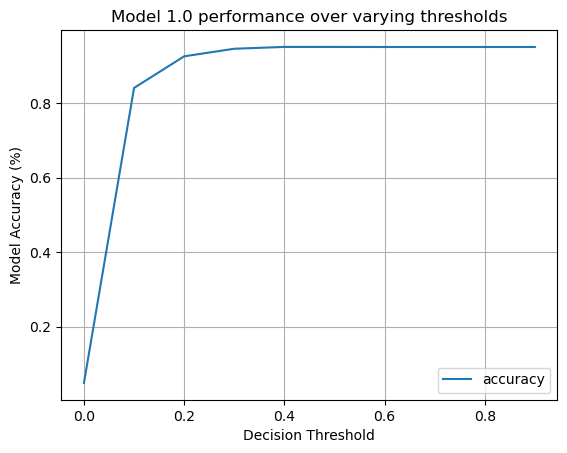

In [53]:
thresholds = np.arange(0, 1, 0.1)

accuracies = []
for p in thresholds:
    accuracies.append(np.mean((y_prob_1 > p) == y))

accuracy_df_1 = pd.DataFrame(index=range(len(thresholds)), 
                           data=zip(thresholds, accuracies), 
                           columns=['Decision Threshold', 'Accuracy'])

display(accuracy_df_1)

pd.DataFrame(data={'accuracy': accuracies}, index=thresholds).plot(kind="line")
plt.xlabel("Threshold")
plt.title("Model 1.0 performance over varying thresholds")
plt.xlabel('Decision Threshold')
plt.ylabel('Model Accuracy (%)')
plt.grid()
plt.show()

With a decision threshold of only 0.1 we are getting 84% accuracy. This shows that we don't have many stroke predictions to make if our threshold is set that low

In [54]:
#create a dataframe of coefficients form our model
log_model_1_df = pd.DataFrame(logreg_results_0.params, columns=['Coefficient'])
#add an odds ratio column
log_model_1_df['odds_ratio'] = np.exp(log_model_1_df['Coefficient']).round(3)

display(log_model_1_df)

,Coefficient,odds_ratio
const,-7.743784,0.000
age,0.070759,1.073
hypertension,0.404587,1.499
heart_disease,0.292121,1.339
avg_glucose_level,0.004061,1.004
bmi,-0.001324,0.999
gender_Male,0.008921,1.009
gender_Other,-3.353043,0.035
work_type_Never_worked,-16.405281,0.000
work_type_Private,0.267173,1.306


In [55]:
# calculating VIF factors
from statsmodels.stats.outliers_influence import variance_inflation_factor

pd.Series([variance_inflation_factor(X_0.values, i) 
               for i in range(X_0.shape[1])], 
              index=X_0.columns)[1:]

age                               1.455107
hypertension                      1.109226
heart_disease                     1.103869
avg_glucose_level                 1.100053
bmi                               1.196977
gender_Male                       1.023509
gender_Other                      1.002291
work_type_Never_worked            1.014630
work_type_Private                 1.086977
Residence_type_Urban              1.002713
smoking_status_formerly smoked    1.536686
smoking_status_never smoked       1.634439
smoking_status_smokes             1.419644
dtype: float64